In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import glob

In [2]:
dir_path = "../land_price_data/"

file_paths = glob.glob(dir_path+"*.csv")
file_paths.sort() 
print(file_paths)
land_prices = []
for file_path in file_paths:
    land_price = pd.read_csv(file_path,encoding="euc-kr")
    land_price.drop(["토지코드","시군구코드","법정동코드","필지구분코드",'본번',"부번","기준년도","기준년월"],axis=1,inplace=True)
    land_price = land_price[land_price["필지구분명"]=="토지"]
    land_price.sort_index()
    land_price.rename(columns={"공시지가(원/㎡)":f"공시지가_{file_path[-8:-4]}"},inplace=True)
    table = land_price.pivot_table(index="시군구명",values=f"공시지가_{file_path[-8:-4]}",aggfunc="mean")
    land_prices.append(table) 
final_land_price = pd.concat(land_prices,axis=1)


['../land_price_data/land_price2013.csv', '../land_price_data/land_price2014.csv', '../land_price_data/land_price2015.csv', '../land_price_data/land_price2016.csv', '../land_price_data/land_price2017.csv', '../land_price_data/land_price2018.csv', '../land_price_data/land_price2019.csv', '../land_price_data/land_price2020.csv', '../land_price_data/land_price2021.csv', '../land_price_data/land_price2022.csv', '../land_price_data/land_price2023.csv']


/tmp/ipykernel_13420/216981974.py:8: DtypeWarning: Columns (3,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  land_price = pd.read_csv(file_path,encoding="euc-kr")
/tmp/ipykernel_13420/216981974.py:8: DtypeWarning: Columns (3,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  land_price = pd.read_csv(file_path,encoding="euc-kr")
/tmp/ipykernel_13420/216981974.py:8: DtypeWarning: Columns (3,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  land_price = pd.read_csv(file_path,encoding="euc-kr")
/tmp/ipykernel_13420/216981974.py:8: DtypeWarning: Columns (3,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  land_price = pd.read_csv(file_path,encoding="euc-kr")
/tmp/ipykernel_13420/216981974.py:8: DtypeWarning: Columns (3,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  land_price = pd.read_csv(file_path,encoding="euc-kr")
/tmp/ipyke

In [3]:
print(final_land_price)

         공시지가_2013     공시지가_2014     공시지가_2015     공시지가_2016     공시지가_2017  \
시군구명                                                                         
강남구   5.851090e+06  6.124114e+06  6.421897e+06  6.649088e+06  7.004993e+06   
강동구   2.664389e+06  2.772626e+06  2.879132e+06  2.981285e+06  3.105743e+06   
강북구   1.657954e+06  1.701655e+06  1.774512e+06  1.831372e+06  1.931860e+06   
강서구   1.712856e+06  1.771720e+06  1.832282e+06  1.894877e+06  1.985367e+06   
관악구   2.377758e+06  2.467289e+06  2.567459e+06  2.654366e+06  2.756011e+06   
광진구   2.605054e+06  2.713687e+06  2.851919e+06  2.832961e+06  3.022757e+06   
구로구   1.990621e+06  2.042783e+06  2.104662e+06  2.168908e+06  2.279490e+06   
금천구   1.871575e+06  1.944147e+06  2.020615e+06  2.086263e+06  2.166841e+06   
노원구   1.658417e+06  1.719677e+06  1.789127e+06  1.847651e+06  1.920135e+06   
도봉구   1.488613e+06  1.572386e+06  1.677119e+06  1.781700e+06  1.884103e+06   
동대문구  2.483550e+06  2.529583e+06  2.596660e+06  2.673959e+06  2.

AttributeError: Text.set() got an unexpected keyword argument 'rotate'

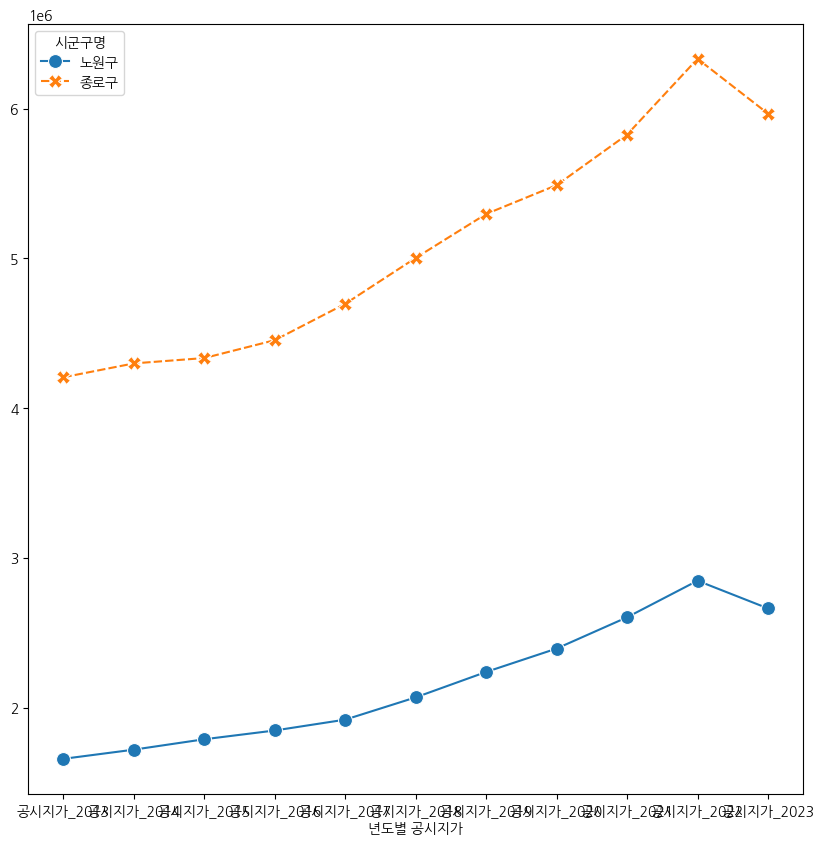

In [9]:
plt.figure(figsize=(10,10))
test = final_land_price.T
sns.lineplot(data=test.loc[:,["노원구","종로구"]],markers=True,markersize=10)
plt.xlabel("년도별 공시지가")
plt.xticks(rotation = 45)
plt.ylabel("구별")
plt.legend(title=None)
plt.show()

In [5]:
test.to_csv("year_gu_land_price")

In [6]:
test.pivot_table(index=test.columns,columns=test.index,aggfunc="mean")

ValueError: Grouper and axis must be same length